# Human Activity Recognisation Dataset

## Problem statement 

In this project we will try to predict human activity (1-Walking, 2-Walking upstairs, 3-Walking downstairs, 4-Sitting, 5-Standing or 6-Laying) by using the smartphone’s sensors. Meaning that by using the following methods, the smartphone can detect what we are doing at the moment.
This data set is collected from recordings of 30 human subjects captured via smartphones
enabled with embedded inertial sensors. This is a multi-classification problem. The data set
has 10,299 rows and 561 columns. 

## Applications and Potential Use

1. Daily Life Monitoring:  Applications in Daily Life Monitoring aim to provide reference for activity logging and monitor exercise and healthy lifestyle practises. Various Smartphone applications with activity recognition techniques have already shown up and specialised devices such as fitbit etc are also popularised.


2. Elderly and Youth Care: These applications can be used to prevent harm and for safety purposes. It can be used to monitor infant sleep patterns and ASD (autistic spectrum disorder) detection also using activity recognition techniques.


3. Personal Biometric Signature: Motion patterns of an individual are usually exclusive and unique. Sensors such as accelerometers can capture those differences. The activity recognition techniques provide a possible solution for human biometric signature with patterns in gestures.

## Step By Step Approach Analysis

1. Importing data and Elementary Data Analysis
2. Feature selection and engineering using PCA
3. Application of various ML algorithms and performance evaluation using accuracy and confusion matrices.
4. Selection of the best algorithm and removing overfitting if necessary
5. Fine tuning and deploying it for test data 

## Algorithm used

## Packages Used

1. Pandas for importing and handling data.
2. Matplotlib for plotting graphs and other plots used in analysis.
3. Numpy for multi-dimensional array and matrix processing 
4. Scikit Learn for a range of algorithms, including clustering, factor analysis, principal component analysis etc.

### 1.  Import Required Libraries 

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
features = list()
with open("data/Features.txt") as f:
    for line in f:
        features.append(line.split()[1])  
len(features)        

561

In [55]:
labels = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "STANDING",
    "LAYING"
]

In [56]:
train_df = pd.read_csv("data/train/X_train.txt", delim_whitespace = True, names = features)

train_df["subject_id"] = pd.read_csv("data/train/subject_train.txt", header = None)

train_df["activity"] = pd.read_csv("data/train/y_train.txt", header = None)
label_name = train_df["activity"].map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})
train_df["activity"] = label_name

train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [57]:
test_df = pd.read_csv("data/test/X_test.txt", delim_whitespace = True, names = features)

test_df["subject_id"] = pd.read_csv("data/test/subject_test.txt", header = None)

test_df["activity"] = pd.read_csv("data/test/y_test.txt", header = None)
label_name = test_df["activity"].map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})
test_df["activity"] = label_name

test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [58]:
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity
0,0.271944,-0.045884,-0.126173,-0.991223,-0.950523,-0.914417,-0.991981,-0.951913,-0.912103,-0.933531,...,-0.859555,-0.054754,-0.045060,0.104774,0.623993,-0.740893,0.254909,-0.071021,19,STANDING
1,0.279670,-0.016973,-0.112339,-0.996651,-0.981544,-0.992492,-0.997302,-0.982681,-0.992942,-0.940944,...,-0.840815,0.006551,0.333905,-0.693329,-0.580610,-0.660869,0.198577,-0.201772,25,STANDING
2,0.302933,-0.010807,-0.082236,-0.413298,-0.104923,-0.310570,-0.472743,-0.097403,-0.298477,-0.047102,...,-0.202500,-0.132823,-0.557667,-0.395982,-0.172542,-0.687455,0.230211,0.194120,27,WALKING
3,0.227099,-0.035456,-0.084810,-0.622350,-0.158412,-0.510100,-0.648887,-0.201606,-0.486515,-0.529681,...,-0.523757,0.363335,0.029103,-0.852212,-0.658663,-0.855627,0.184541,-0.034419,25,WALKING
4,0.276426,-0.017538,-0.112387,-0.995684,-0.986684,-0.985936,-0.995865,-0.985498,-0.986192,-0.939230,...,-0.867300,-0.030527,0.247046,-0.691627,-0.248657,-0.654532,0.298122,0.149988,21,STANDING


In [59]:
print(train_df.shape)
print(test_df.shape)

(7352, 563)
(2947, 563)


### 2. EDA

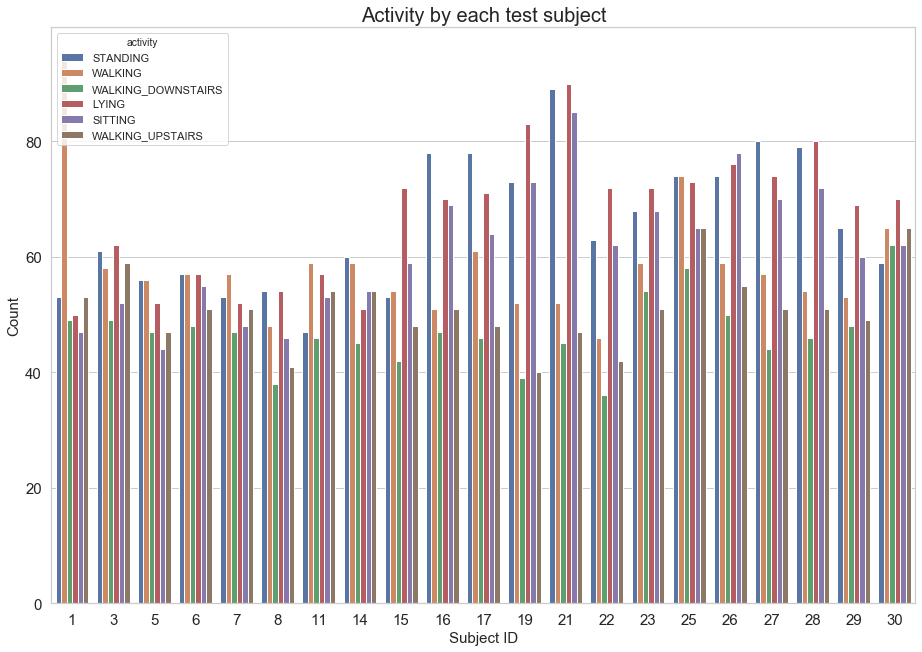

In [60]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Activity by each test subject", fontsize = 20)
plt.tick_params(labelsize = 15)
sns.countplot(x = "subject_id", hue = "activity", data = train_df)
plt.xlabel("Subject ID", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

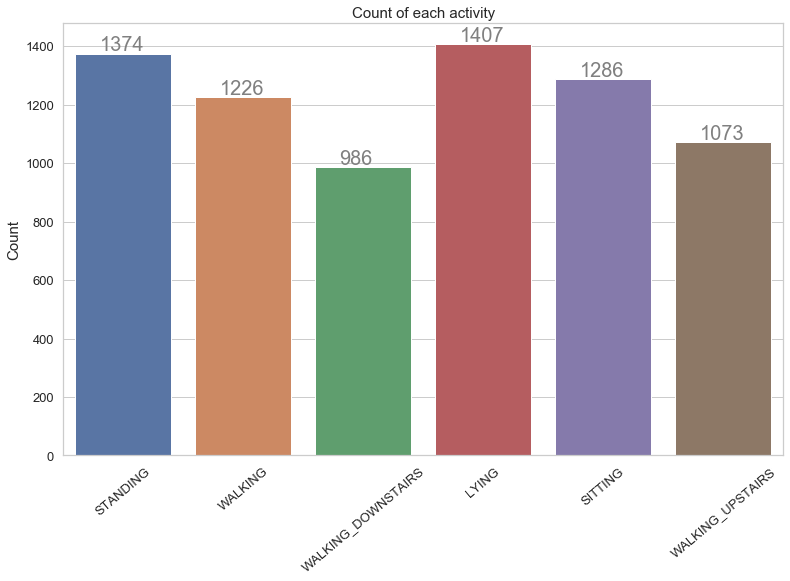

In [61]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each activity", fontsize = 15)
plt.tick_params(labelsize = 10)
sns.countplot(x = "activity", data = train_df)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 40)
plt.show()

<Figure size 720x720 with 0 Axes>

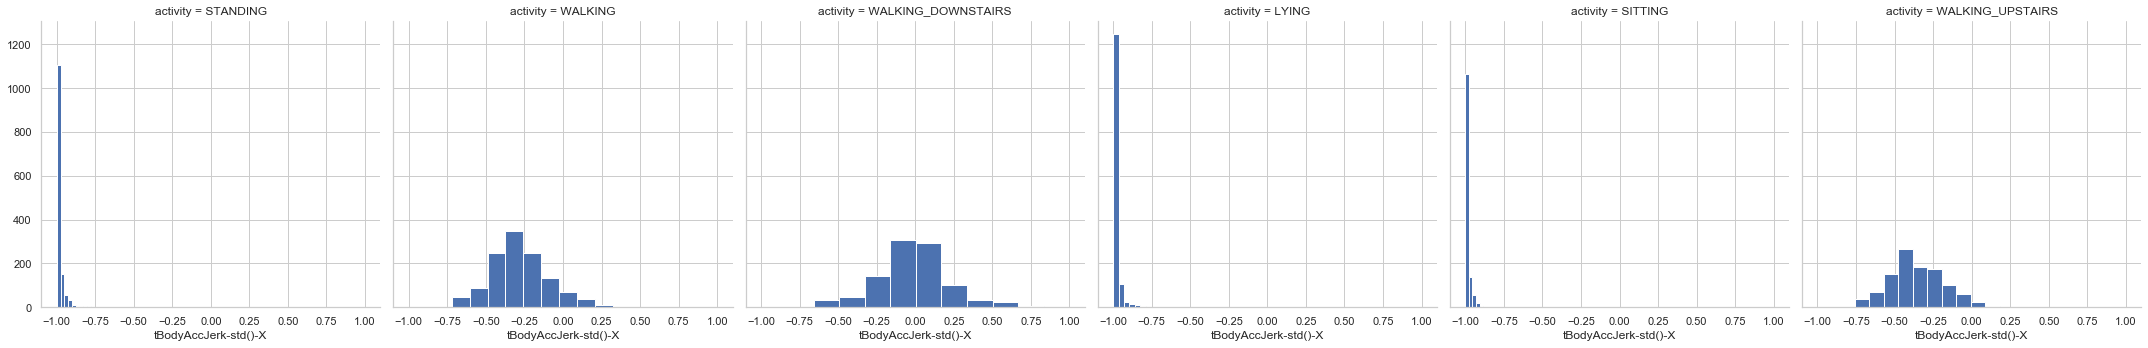

In [62]:
fig= plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
g = sns.FacetGrid(train_df,col='activity',height=5)
g.map(plt.hist,'tBodyAccJerk-std()-X')

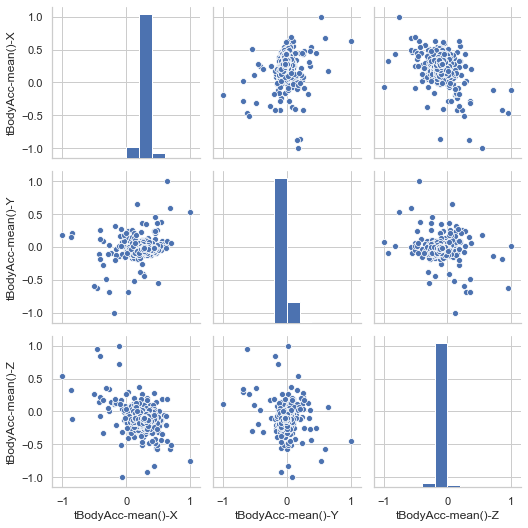

In [63]:
sns.set(style='whitegrid',context='notebook')
cols=['tBodyAcc-mean()-X','tBodyAcc-mean()-Y','tBodyAcc-mean()-Z']

sns.pairplot(train_df[cols],size=2.5)
plt.tight_layout()
plt.show()

In [64]:
pivoted=train_df.pivot_table(index='subject_id',columns='activity',aggfunc='count').iloc[:,:6]

count_df=pd.DataFrame(pivoted.to_records())
count_df=count_df.set_index('subject_id')
count_df.columns=['LAYING','SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
count_df

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject_id,,,,,,
1,50,47,53,95,49,53
3,62,52,61,58,49,59
5,52,44,56,56,47,47
6,57,55,57,57,48,51
7,52,48,53,57,47,51
8,54,46,54,48,38,41
11,57,53,47,59,46,54
14,51,54,60,59,45,54
15,72,59,53,54,42,48


In [65]:
duration_df=count_df*2.5
duration_df

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject_id,,,,,,
1,125.0,117.5,132.5,237.5,122.5,132.5
3,155.0,130.0,152.5,145.0,122.5,147.5
5,130.0,110.0,140.0,140.0,117.5,117.5
6,142.5,137.5,142.5,142.5,120.0,127.5
7,130.0,120.0,132.5,142.5,117.5,127.5
8,135.0,115.0,135.0,120.0,95.0,102.5
11,142.5,132.5,117.5,147.5,115.0,135.0
14,127.5,135.0,150.0,147.5,112.5,135.0
15,180.0,147.5,132.5,135.0,105.0,120.0


In [66]:
duration_df['ACTIVE']=duration_df['WALKING']+duration_df['WALKING_DOWNSTAIRS']+duration_df['WALKING_UPSTAIRS']
duration_df['PASSIVE']=duration_df['LAYING']+duration_df['SITTING']+duration_df['STANDING']
duration_df

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,ACTIVE,PASSIVE
subject_id,,,,,,,,
1,125.0,117.5,132.5,237.5,122.5,132.5,492.5,375.0
3,155.0,130.0,152.5,145.0,122.5,147.5,415.0,437.5
5,130.0,110.0,140.0,140.0,117.5,117.5,375.0,380.0
6,142.5,137.5,142.5,142.5,120.0,127.5,390.0,422.5
7,130.0,120.0,132.5,142.5,117.5,127.5,387.5,382.5
8,135.0,115.0,135.0,120.0,95.0,102.5,317.5,385.0
11,142.5,132.5,117.5,147.5,115.0,135.0,397.5,392.5
14,127.5,135.0,150.0,147.5,112.5,135.0,395.0,412.5
15,180.0,147.5,132.5,135.0,105.0,120.0,360.0,460.0


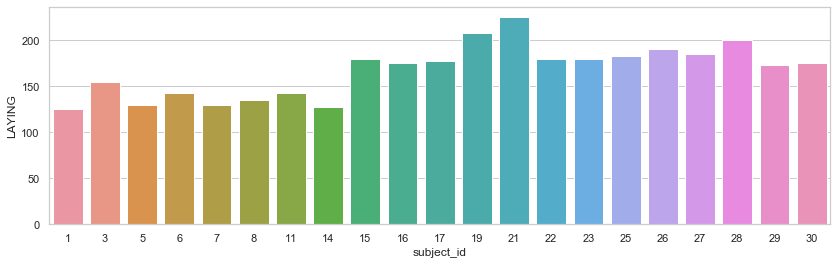

In [67]:
plt.figure(figsize=(14,4))
sns.barplot(x=duration_df.index,y=duration_df.LAYING)

Observation: Person 1 and 14 sleep very less.

The missing persons in x-axis are present in test data

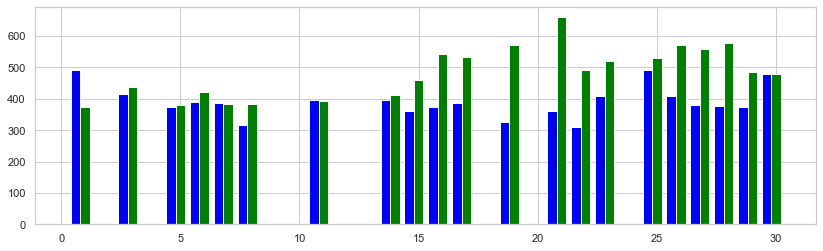

In [68]:
x=duration_df.index
plt.figure(figsize=(14,4))
ax=plt.subplot(111)
ax.bar(x-0.4,duration_df.ACTIVE,width=0.4,color='blue',align='center')
ax.bar(x,duration_df.PASSIVE,width=0.4,color='green',align='center')
plt.show()

Observation: Person 19 and 20 are highly inactive

### 3. Feature Selection and Dimentionality Reduction

In [69]:
X_train = train_df.iloc[:,:-1].values
y_train = train_df.iloc[:,-1].values
X_test = test_df.iloc[:,:-1].values
y_test = test_df.iloc[:,-1].values
X_train.shape

(7352, 562)

In [70]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
XTR = pd.DataFrame(X_train.T)
XTE = pd.DataFrame(X_test.T)
#XT.duplicated()

unique_features = [not i for i in XTR.duplicated()]
X_train = XTR[unique_features].T
X_test = XTE[unique_features].T
X_train.shape

(7352, 541)

In [72]:
df = pd.concat([train_df,test_df])

In [73]:
df.columns
import re
pattern = r'[()-.,]+'

tempcol = []
col_new = []
for col in train_df.columns:
  new_string = re.sub(pattern, '_', col) 
  col_new.append(new_string)
  tempcol.append(new_string.split('_')[0])
  
df.columns = col_new

print('The main columns are:')
for temp in list(set(tempcol)):
    print(temp)


The main columns are:
tBodyAcc
tBodyGyroJerkMag
fBodyAccJerk
tBodyGyroMag
tBodyAccJerk
tBodyGyro
tBodyAccJerkMag
fBodyBodyGyroMag
activity
angle
tBodyAccMag
fBodyAcc
tBodyGyroJerk
tGravityAcc
fBodyAccMag
fBodyBodyGyroJerkMag
tGravityAccMag
fBodyGyro
fBodyBodyAccJerkMag
subject


In [74]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["WALKING", "LAYING", "STANDING", "SITTING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS"])
df['activity'] = le.fit_transform(df['activity'])
df_en = df.drop(columns=['subject_id']) #dropping unwanted columns
df_en_data = df_en.drop(columns = ['activity'])
df_en_target = df_en['activity']
df_en_target.value_counts()

0    1944
2    1906
1    1777
3    1722
5    1544
4    1406
Name: activity, dtype: int64

0    1944
2    1906
1    1777
3    1722
5    1544
4    1406
Name: activity, dtype: int64


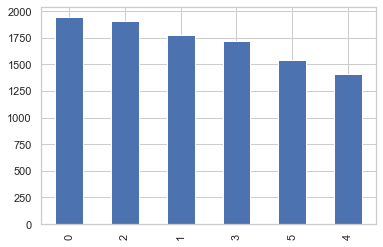

In [75]:
print(df.activity.value_counts())
df.activity.value_counts().plot.bar()

In [76]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()
df_robust = robustscaler.fit_transform(df_en_data)
df_robust

array([[-0.20325441, -2.01168069, -0.75017328, ..., -0.0854052 ,
         0.29311695, -0.28588189],
       [ 0.09699904,  0.01322602, -0.1597407 , ...,  0.18514344,
         0.06655605, -0.8426259 ],
       [ 1.00116715,  0.44503208,  1.12511066, ...,  0.09525846,
         0.19378313,  0.84309807],
       ...,
       [-2.20494547,  1.01396533, -0.63352392, ...,  0.09847948,
         0.49774652,  0.35809357],
       [-0.48897119,  2.30720688,  2.05087003, ..., -0.56651944,
        -0.23108222, -0.25116299],
       [-0.48729762,  0.52138496,  0.85877903, ..., -0.10541609,
        -1.05594343,  0.09550633]])

In [77]:
print('Covariance matrix \n')
df_en_cov_mat= np.cov(df_robust, rowvar=False)
df_en_cov_mat
df_en_cov_mat = np.cov(df_robust.T)
eig_vals, eig_vecs = np.linalg.eig(df_en_cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)
tot = sum(eig_vals)
print("\n",tot)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print("\n\n1. Variance Explained\n",var_exp)
cum_var_exp = np.cumsum(var_exp)
print("\n\n2. Cumulative Variance Explained\n",cum_var_exp)
print("\n\n3. Percentage of variance the first 200 principal components each contain\n ",var_exp[0:150])
print("\n\n4. Percentage of variance the first 200 principal components together contain\n",sum(var_exp[0:150]))

Covariance matrix 

Eigenvectors 
[[ 1.65370310e-03+0.00000000e+00j  9.11831195e-03+0.00000000e+00j
   6.24951980e-02+0.00000000e+00j ... -1.24268563e-15+0.00000000e+00j
  -1.67593567e-16-1.71177507e-16j -1.67593567e-16+1.71177507e-16j]
 [-5.20909421e-03+0.00000000e+00j -2.00503790e-03+0.00000000e+00j
   7.84875359e-03+0.00000000e+00j ...  3.63856392e-15+0.00000000e+00j
   4.90706378e-16+5.01051353e-16j  4.90706378e-16-5.01051353e-16j]
 [-3.50964412e-03+0.00000000e+00j -5.44517341e-03+0.00000000e+00j
  -1.34946892e-02+0.00000000e+00j ... -1.61800445e-13+0.00000000e+00j
  -2.18185724e-14-2.22866837e-14j -2.18185724e-14+2.22866837e-14j]
 ...
 [-3.98811780e-02+0.00000000e+00j -1.67908300e-01+0.00000000e+00j
  -1.16401353e-01+0.00000000e+00j ... -5.81410734e-13+0.00000000e+00j
  -7.84111702e-14-8.00895428e-14j -7.84111702e-14+8.00895428e-14j]
 [ 3.25596826e-02+0.00000000e+00j  9.74638477e-02+0.00000000e+00j
   5.33550579e-02+0.00000000e+00j ... -2.19081844e-13+0.00000000e+00j
  -2.95516421

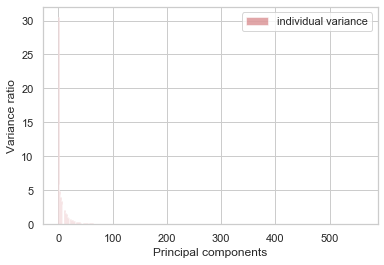

In [78]:
plt.bar(range(561), var_exp,alpha=0.5,align='center', label='individual variance',color='r')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

Text(0.5, 0, 'Principal components')

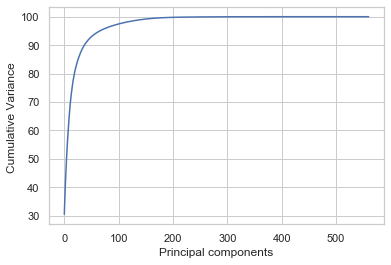

In [79]:
plt.plot(cum_var_exp)
plt.ylabel('Cumulative Variance ')
plt.xlabel('Principal components')

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
principalComponents = pca.fit_transform(df_robust)
df_pca = pd.DataFrame(data = principalComponents)
df_pca.shape

(10299, 144)

In [33]:
X = df_pca
Y = df_en_target
results = []

### 5.Comparision of various Classification Models

In [151]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=5, random_state=40, shuffle=True)

In [152]:
#LogisticRegression
accuracies = cross_val_score(estimator=LogisticRegression(), X=X, y=Y, cv=kfold)
results.append(accuracies.mean())
print(accuracies)
print("Mean Accuracy:- ",accuracies.mean())

[0.96941748 0.96893204 0.9631068  0.97669903 0.96357455]
Mean Accuracy:-  0.9683459781117236


In [153]:
#RandomForestClassifier
accuracies = cross_val_score(estimator=RandomForestClassifier(n_estimators=100), X=X, y=Y, cv=kfold)
results.append(accuracies.mean())
print(accuracies)
print("Mean Accuracy:- ",accuracies.mean())

[0.91116505 0.91262136 0.93106796 0.92961165 0.91743565]
Mean Accuracy:-  0.9203803335580945


In [154]:
#GaussianNB
accuracies = cross_val_score(estimator=GaussianNB(), X=X, y=Y, cv=kfold)
results.append(accuracies.mean())
print(accuracies)
print("Mean Accuracy:- ",accuracies.mean())

[0.70485437 0.7        0.72475728 0.73446602 0.70908208]
Mean Accuracy:-  0.7146319497163767


In [155]:
#KNN
accuracies = cross_val_score(estimator=KNeighborsClassifier(), X=X, y=Y, cv=kfold)
results.append(accuracies.mean())
print(accuracies)
print("Mean Accuracy:- ",accuracies.mean())

[0.90194175 0.88883495 0.89951456 0.91019417 0.89558038]
Mean Accuracy:-  0.8992131631435752


In [156]:
#SVC
accuracies = cross_val_score(estimator=SVC(probability=True), X=X, y=Y, cv=kfold)
results.append(accuracies.mean())
print(accuracies)
print("Mean Accuracy:- ",accuracies.mean())

[0.84854369 0.8631068  0.86941748 0.8723301  0.86352598]
Mean Accuracy:-  0.8633848083479114


In [157]:
#DecisionTreeClassifier
accuracies = cross_val_score(estimator=DecisionTreeClassifier(), X=X, y=Y, cv=kfold)
results.append(accuracies.mean())
print(accuracies)
print("Mean Accuracy:- ",accuracies.mean())

[0.79514563 0.79320388 0.79320388 0.79466019 0.7867897 ]
Mean Accuracy:-  0.7926006591945379


In [163]:
models = [
    'LogisticRegression',
    'RandomForestClassifier',
    'GaussianNB',
    'KNeighborsClassifier',
    'SVC',
    'DecisionTreeClassifier'
    ]

results = [i*100 for i in results]

In [164]:
data = {
    'Algorithm':models,
    'Accuracy': results
}

df = pd.DataFrame(data, columns = ['Algorithm', 'Accuracy'])
df.sort_values(inplace=True, by = ['Accuracy'], ascending = False)
df

,Algorithm,Accuracy
0,LogisticRegression,96.834598
1,RandomForestClassifier,92.038033
3,KNeighborsClassifier,89.921316
4,SVC,86.338481
5,DecisionTreeClassifier,79.260066
2,GaussianNB,71.463195


([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

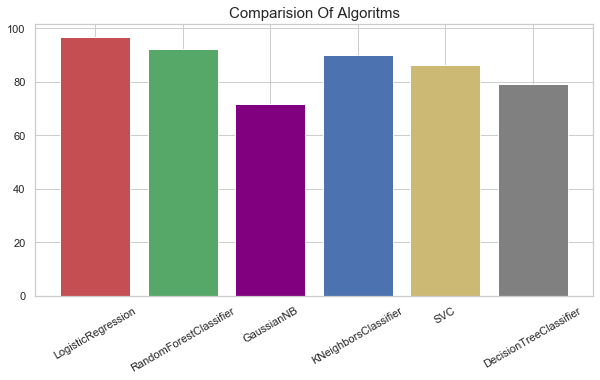

In [167]:
plt.figure(figsize=(10,5))
plt.title('Comparision Of Algoritms',fontsize=15)
plt.bar(models,results,color=['r','g','purple','b','y','grey'])
plt.xticks(rotation = 30)

#### From these results, it would suggest logistic regression is worthy of further study on this problem.

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4, random_state=42)

In [48]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[790   0   0   0   0   0]
 [  1 649  51   0   0   3]
 [  0  58 741   0   0   0]
 [  0   0   0 690   5   5]
 [  0   0   0   3 531   3]
 [  0   1   0   5  10 574]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       790
           1       0.92      0.92      0.92       704
           2       0.94      0.93      0.93       799
           3       0.99      0.99      0.99       700
           4       0.97      0.99      0.98       537
           5       0.98      0.97      0.98       590

    accuracy                           0.96      4120
   macro avg       0.97      0.97      0.97      4120
weighted avg       0.96      0.96      0.96      4120

0.9648058252427184


### 6.HyperTuning of Parameters

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.1, 1, 100]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [38]:
# Create grid search using 5-fold cross validation
grid = GridSearchCV(clf, hyperparameters, cv=5, verbose=1, n_jobs=-1)

In [39]:
# Fit grid search
best_model = grid.fit(X, Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 19.3min finished


In [40]:
# View best hyperparameters
print('Best Penalty:', grid.best_estimator_.get_params()['penalty'])
print('Best C:', grid.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 100


In [43]:
grid.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
final_model = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[790   0   0   0   0   0]
 [  0 655  45   0   0   4]
 [  0  61 738   0   0   0]
 [  0   0   1 685   6   8]
 [  0   0   0   2 530   5]
 [  2   0   0   7  10 571]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       790
           1       0.91      0.93      0.92       704
           2       0.94      0.92      0.93       799
           3       0.99      0.98      0.98       700
           4       0.97      0.99      0.98       537
           5       0.97      0.97      0.97       590

    accuracy                           0.96      4120
   macro avg       0.96      0.96      0.96      4120
weighted avg       0.96      0.96      0.96      4120



0.9633495145631068